# Notebook CHARPENTIER Nicolas

# 1. Lien entre le prix des billets et l'age du passager + régression linaire


In [7]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
%matplotlib inline
import csv as csv

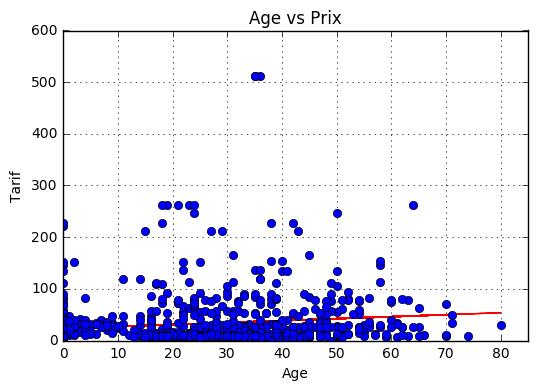

In [394]:
df = pd.read_csv('train.csv', header=0)
df.fillna(0, inplace=True)
Age  = df['Age']
Age = Age.astype(np.int64)
Tarif = df['Fare']
a, b, c, d, e = ss.linregress(Age,Tarif)
plt.figure();
plt.title('Age vs Prix')
plt.xlabel('Age')
plt.ylabel('Tarif')
plt.plot(Age, Tarif, 'k.')
line = a*Age+b
plt.plot(Age,line,'r-',Age,Tarif,'o')
plt.axis([0, 85, 0, 600])
plt.grid(True)
plt.show()



Nous voyons ici la présence de valeurs résiduelles grace à la regression linéaire.

# 2. Corrélation entre les personnes ayant survécu en fonction du prix de leur billet

In [278]:
#Etablissement de la moyenne du billet
fare = data[0::,9].astype(np.float)
moyenneBillet = np.average(fare)
print('Prix moyen du billet : {p: .2f} €'.format(p=moyenneBillet))

listePascher = fare < moyenneBillet
listeCher = fare >= moyenneBillet

Pauvres = data[listePascher,1].astype(np.float)     
Riches = data[listeCher,1].astype(np.float)

ProportionPauvresSurvivants = np.sum(Pauvres) / np.size(Pauvres)  
ProportionRichesSurvivants = np.sum(Riches) / np.size(Riches) 

print('Proportion de pauvres qui survivent {p:.2f}'.format(
        p=ProportionPauvresSurvivants))
print('Proportion de riches qui survivent {p:.2f}'.format(
        p=ProportionRichesSurvivants))


Prix moyen du billet :  32.20 €
Proportion de pauvres qui survivent 0.32
Proportion de riches qui survivent 0.60


# 3. Corrélation entre les survivants femmes et hommes

In [357]:
tt = pd.read_csv('train.csv', header=0)

sexF = tt["Sex"] == "female"
sexM = tt["Sex"] == "male"
survOK = tt["Survived"] == 1
survKO = tt["Survived"] == 0
nbF =  tt[sexF]
nbM = tt[sexM]
nbSurvOK = tt[survOK]

FOK = tt [ sexF & survOK ]
FKO = tt [ sexF & survKO ]
MOK = tt [ sexM & survOK ]
MKO = tt [ sexM & survKO ]
#print bb

nbFOK = len(FOK)
nbFKO = len(FKO)
nbMOK = len(MOK)
nbMKO = len(MKO)

proportionFOK = float(nbFOK) / float(len(nbF))
proportionFKO = float(nbFKO) / float(len(nbF))
proportionMOK = float(nbMOK) / float(len(nbM))
proportionMKO = float(nbMKO) / float(len(nbM))
proportionHommeOK = float(nbMOK) / float(len(nbSurvOK))
proportionFemmeOK = float(nbFOK) / float(len(nbSurvOK))

print('Proportion femmes vivantes : {p:.2f} '.format(p=proportionFOK))
print('Proportion femme mortes : {p:.2f} '.format(p=proportionFKO))
print('Proportion hommes vivants : {p:.2f} '.format(p=proportionMOK))
print('Proportion hommes morts : {p:.2f} '.format(p=proportionMKO))

Proportion femmes vivantes : 0.74 
Proportion femme mortes : 0.26 
Proportion hommes vivants : 0.19 
Proportion hommes morts : 0.81 


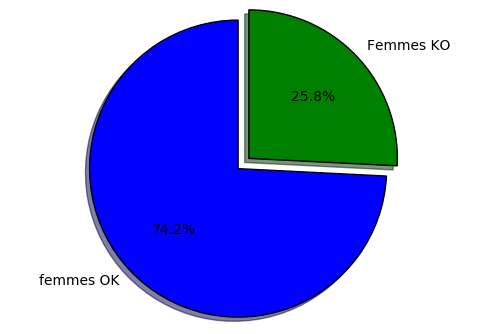

In [310]:
name = ['Hemmes OK', 'Femmes KO']
data = [proportionFOK, proportionFKO, ]

explode=(0, 0.1)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

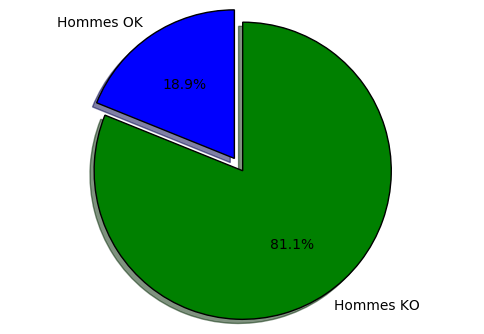

In [312]:
name = ['Hommes OK', 'Hommes KO']
data = [proportionMOK, proportionMKO ]

explode=(0, 0.1)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

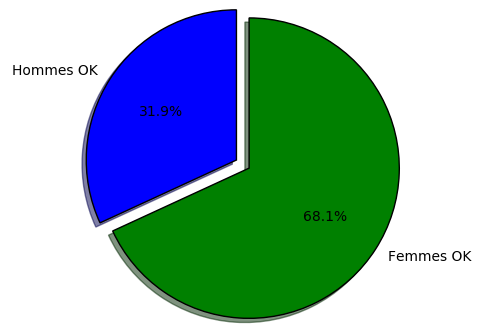

In [363]:
name = ['Hommes OK', 'Femmes OK']
data = [proportionHommeOK, proportionFemmeOK ]

explode=(0, 0.1)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()